In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

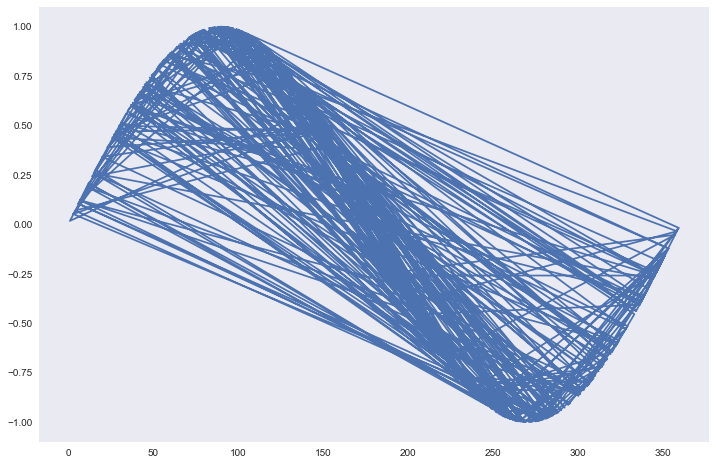

In [17]:
N = 360
df = pd.DataFrame()
## создаём 360 случайных точек для оси времени
df['t'] = np.random.randint(low=1, high=N, size=N)
## строим синус на этих точках
df['y'] = np.sin(df.t * np.pi / 180) 
## сортируем (или не сортируем) ряд по времени
#df = df.sort_values(by='t')

## визуализируем
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df.t, df.y)
ax.grid()
plt.show()

# 8.4. Способы визуализации в Python
Встроенный в pandas метод `plot`

`Pandas` позволяет строить различные виды графиков и чартов. При быстрой разработке подходит встроенный метод `pandas.plot`:

Однако, этот метод не подходит, если нужно больше контроля над графиком. В частности, pandas не всегда может красиво отобразить даты на оси абсцисс.

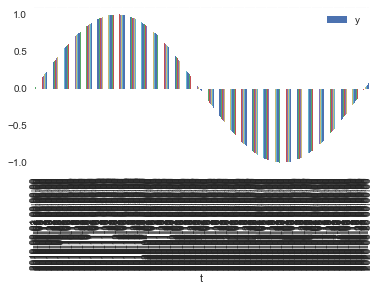

In [18]:
df = pd.DataFrame()
## создаём 365 дат с частотой в 1 день, начиная с 1 сентября 2019
df['t'] = pd.date_range(start= '2019-09-01 ', periods=365, freq= 'D')
## строим синус, используя индекс таймфрейма
df['y'] = np.sin(df.index * np.pi / 180)
## визуализируем при помощи pandas
df.plot(x='t', y='y', kind='bar')

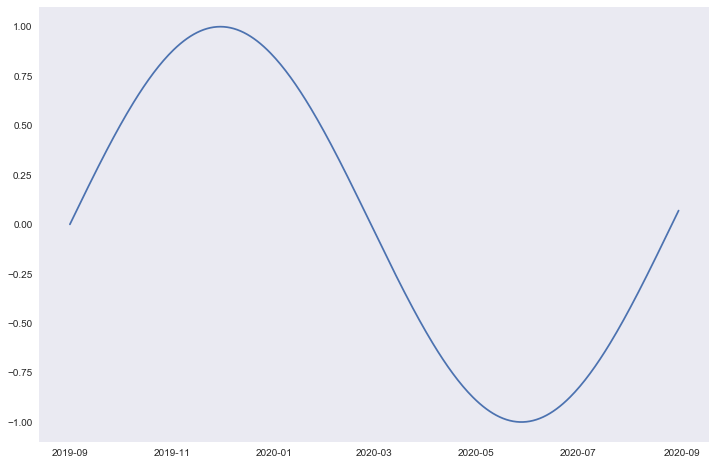

In [19]:
df = df.sort_values(by='t')

## визуализируем
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df.t, df.y)
ax.grid()
plt.show()

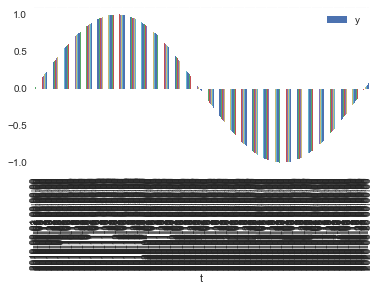

In [20]:
df = pd.DataFrame()
## создаём 365 дат с частотой в 1 день, начиная с 1 сентября 2019
df['t'] = pd.date_range(start= '2019-09-01 ', periods=365, freq= 'D')
## строим синус, используя индекс таймфрейма
df['y'] = np.sin(df.index * np.pi / 180)
## визуализируем при помощи pandas
df.plot(x='t', y='y', kind='bar')

### matplotlib

При помощи `matplotlib` можно кастомизировать графики, добавляя все необходимые элементы (подписывать оси, менять размеры шрифтов, добавлять текст и стрелки, строить график в графике и прочее).

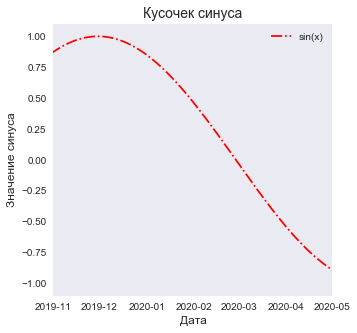

In [21]:
f = plt.figure(figsize=(5, 5))
plt.plot(df.t, df.y, ls='-.', c='r')
plt.xlim(['2019-11-01', '2020-05'])
plt.legend(['sin(x)'])
plt.title('Кусочек синуса', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение синуса', fontsize=12)
plt.grid()
# executed in 201ms, finished 20:35:37 2019-08-10

### AX

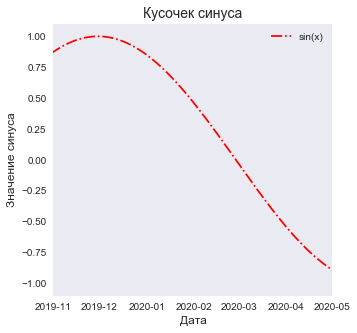

In [22]:
f, ax = plt.subplots(figsize=(5, 5))                                
ax.plot(df.t, df.y, ls='-.', c='r')                                
ax.set_xlim(['2019-11-01', '2020-05'])                              
ax.legend(['sin(x)'])                                              
ax.set_title('Кусочек синуса', fontsize=14)                         
ax.set_xlabel('Дата', fontsize=12)                                  
ax.set_ylabel('Значение синуса', fontsize=12)                     
ax.grid()                                                           

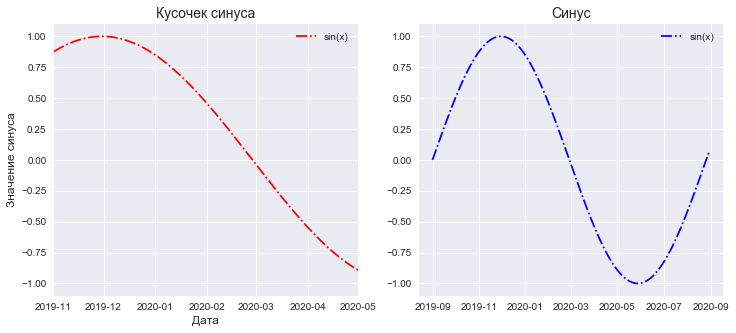

In [23]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(df.t, df.y, ls='-.', c='r')
ax[0].set_xlim(['2019-11-01', '2020-05'])
ax[0].legend(['sin(x)'])
ax[0].set_title('Кусочек синуса', fontsize=14)
ax[0].set_xlabel('Дата', fontsize=12)
ax[0].set_ylabel('Значение синуса', fontsize=12)
ax[0].grid()

ax[1].plot(df.t, df.y, ls='-.', c='b')
ax[1].legend(['sin(x)'])
ax[1].set_title('Cинус', fontsize=14)
ax[0].grid()

Со стандартными настройками текст на графиках получается слишком мелким.

Чтобы на каждом графике не писать вручную fontsize=..., применяются глобальные настройки графиков. Делается это при помощи обращения  plt.rcParams:

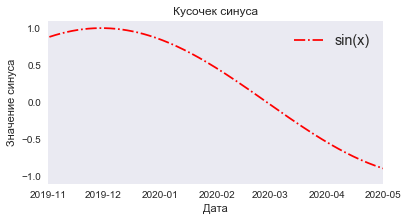

In [24]:
## глобальные настройки графиков
plt.rcParams['figure.figsize'] = [6.0, 3.0]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

f, ax = plt.subplots()                                
ax.plot(df.t, df.y, ls='-.', c='r')                                
ax.set_xlim(['2019-11-01', '2020-05'])                              
ax.legend(['sin(x)'])                                              
ax.set_title('Кусочек синуса')                         
ax.set_xlabel('Дата')                                  
ax.set_ylabel('Значение синуса')                     
ax.grid()                                                           

### Визуализация при помощи `seaborn`

В `seaborn` более эстетический вид графиков, чем в `matplotlib`.

`seaborn` позволяет легко делать некоторые классы визуализаций, которые сложно сделать в `matplotlib`, например, `сlustermap`.

In [25]:
import seaborn as sns
sns.set() ## ставим эстетические параметры
## визуализируем при помощи seaborn
# sns.lineplot(x="t", y="y", data=df)

### Визуализация при помощи plotly

Создание графиков при plotly более трудоёмко, но графики сразу получаются интерактивными.

In [26]:
import plotly.graph_objects as go 

## создаём фигуру и добавляем в неё график
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.t, y=df.y, mode='lines'))
fig.show()

### Визуализация финансовых данных

Встроенный метод Plotly — Candlestick() — рисует японские свечи и автоматически добавляет ползунок под график для скроллинга.

In [29]:
import plotly.graph_objects as go
import pandas as pd

## загружаем стоимость акций apple
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
## говорим методу Candlestick какие колонки дейтафрейма использовать
data = [go. Candlestick(x      =df['Date'],
                        open   =df['AAPL.Open'],
                        high   =df['AAPL.High'],
                        low    =df['AAPL.Low'],
                        close  =df['AAPL.Close'])]
 ## отображаем фигуру с данными
fig = go.Figure(data)
fig.show() 

## 8.6. Практика

In [30]:
df = pd.read_csv('./Unit_7_data/srt_data.csv')
df.head()

,ts,serialNo,home,batteryVoltageMilliV,insideTemperatureCentiC,humidityMilliPerc
0,2018-10-01,VA4202760704,165132,2787.1310,1953.0737,575.49180
1,2018-10-02,VA4202760704,165132,2786.1047,1901.0000,550.63710
2,2018-10-03,VA4202760704,165132,2784.6934,1878.0369,550.09204
3,2018-10-04,VA4202760704,165132,2773.3500,1976.9114,583.65820
4,2018-10-05,VA4202760704,165132,2776.4314,2041.4010,589.74110


### Задание 8.6.1
Выберите данные с датчика с серийным номером `VA2170620672`.

Укажите максимальное значение напряжения на батарее (`batteryVoltageMilliV`).

In [31]:
df[df.serialNo=='VA2170620672'].batteryVoltageMilliV.max()

3219.567

### Задание 8.6.2
Для того же датчика укажите значение напряжения на батарее, соответствующее $75$% квантиля распределения.

In [32]:
ttt = df[df.serialNo=='VA2170620672'].batteryVoltageMilliV

np.quantile(ttt,0.75)

AttributeError: module 'numpy' has no attribute 'quantile'

### Задание 8.6.3
Для того же датчика выберите данные **за ноябрь 2018 г**. и укажите медианное значение на влажности (`humidityMilliPerc`).

In [33]:
df[df.serialNo=='VA2170620672']

,ts,serialNo,home,batteryVoltageMilliV,insideTemperatureCentiC,humidityMilliPerc
2683,2018-10-11,VA2170620672,234419,3219.5670,2089.8218,557.57960
2684,2018-10-12,VA2170620672,234419,3204.8310,1991.7760,670.36255
2685,2018-10-13,VA2170620672,234419,3181.2230,2087.8027,679.25050
2686,2018-10-14,VA2170620672,234419,3167.7480,2017.2100,648.57200
2687,2018-10-15,VA2170620672,234419,3156.4385,2006.8866,714.70510
2688,2018-10-16,VA2170620672,234419,3146.2903,2026.2712,657.34955
2689,2018-10-17,VA2170620672,234419,3136.2937,2020.3385,710.98834
2690,2018-10-18,VA2170620672,234419,3127.3594,2031.4558,611.31620
2691,2018-10-19,VA2170620672,234419,3119.0645,1991.5312,689.83870
2692,2018-10-20,VA2170620672,234419,3110.4348,1943.0642,648.63855


In [34]:
df['date'] = pd.to_datetime(df.ts,format='%Y-%m-%d')

In [35]:
month_mask = (df.date.dt.year == 2018) & (df.date.dt.month == 11)

In [36]:
df[month_mask][df[month_mask].serialNo=='VA2170620672'].humidityMilliPerc.median()

566.3562

### Задание 8.6.4
Выберите данные с датчика с серийным номером **VA2048854528**.

Постройте график напряжения на батарее (`batteryVoltageMilliV`).

Укажите, сколько раз батарея была заменена (количество пиков со значением выше **3200 mV**).

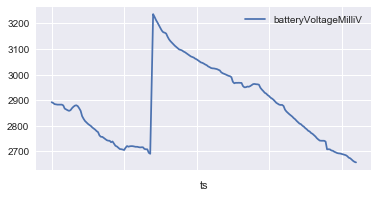

In [37]:
df[df.serialNo=='VA2048854528'].plot('ts', 'batteryVoltageMilliV')

### Задание 8.6.5
Укажите, сколько значений температуры (среди всех данных) лежат строго ниже 1200 сС (12 градусов Цельсия).

In [38]:
(df.insideTemperatureCentiC < 1200).sum()

92

### Задание 8.6.6
Укажите, сколько значений температуры (среди всех данных) лежат нестрого выше 75%-квантиля, вычисленного по всем датчикам.

In [45]:
# q_75 = np.quantile(df.insideTemperatureCentiC.dropna(),0.75)
q_75 = np.percentile(df.insideTemperatureCentiC.dropna(),75)

(df.insideTemperatureCentiC.dropna() > q_75).sum()

1206

## 8.8. Практика

In [46]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

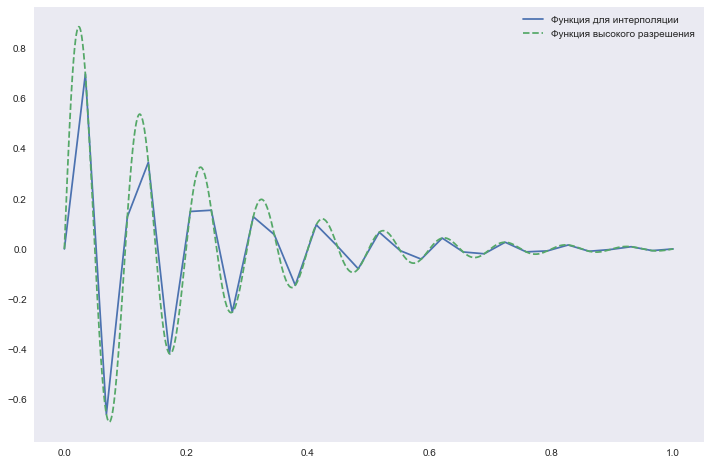

In [47]:
w1 = 10    
a1 = 1     
Fs = 30 
Ts = 1.0/Fs
alpha = 5

## исходная ось (низкое разрешение)
t = np.linspace(0, 1, Fs)
## функция для интерполяции
y = a1*np.exp(-alpha*t) * np.sin(2*np.pi*w1*t) 
 

## интерполяционная сетка (высокое разрешение)
tt = np.linspace(0, 1, 100*Fs)
## функция высокого разрешения (пытаемся получить её интерполяцией)
y_high_res = a1*np.exp(-alpha*tt) * np.sin(2*np.pi*w1*tt) 

f, ax = plt.subplots(figsize=(12, 8))
ax.plot(t, y)
ax.plot(tt, y_high_res, '--')
ax.legend(['Функция для интерполяции', 'Функция высокого разрешения'])
ax.grid()
plt.show()

### Задание 8.8.1
Проинтерполируйте функцию **y** на сетке **tt** кубическим сплайном, используйте для этого `interpolate.interp1d`. Укажите среднее квадратическое отклонение интерполированной функции от функции высокого разрешения **y_high_res** по формуле $$MSE=\frac{1}{N}\sum_{1}^{N}(y_i−\hat{y}_i)^2$$, округлите до 5 знака после точки.

In [60]:
from sklearn.metrics import mean_squared_error

y_intr = interpolate.interp1d(t,y,kind='cubic')

mse = mean_squared_error(y_high_res,y_intr(tt))
round(mse,5)

0.00105

Запустите код в следующей ячейке.

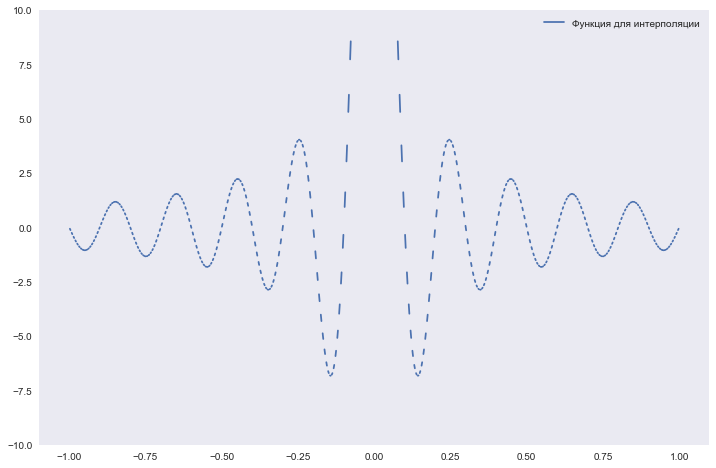

,t,y,y_lost
0,-1.000000,-1.224647e-15,NaN
1,-0.997998,-6.297937e-02,-0.062979
2,-0.995996,-1.259624e-01,-0.125962
3,-0.993994,-1.887000e-01,NaN
4,-0.991992,-2.509431e-01,-0.250943
5,-0.989990,-3.124436e-01,-0.312444
6,-0.987988,-3.729553e-01,NaN
7,-0.985986,-4.322350e-01,-0.432235
8,-0.983984,-4.900431e-01,-0.490043
9,-0.981982,-5.461451e-01,NaN


In [48]:
w1 = 5   
a1 = 1     
Fs = 1000
Ts = 1.0/Fs
alpha = 5

df = pd.DataFrame()
## ось
df['t'] = np.linspace(-1, 1, Fs)
## функция для интерполяции
df['y'] = np.sin(2*np.pi*w1*df.t) / df.t 
 
## пропущенные значения    
df['y_lost'] = df.y
df.loc[0::3, 'y_lost'] = np.nan


f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y_lost)
ax.set_ylim([-10, 10])
ax.legend(['Функция для интерполяции'])
ax.grid()
plt.show()

df.head(10)

### Задание 8.8.2
Проинтерполируйте пропущенные значения функции **y_lost**, используя метод `interpolate` с параметром `nearest` из пакета `pandas`. Укажите среднее квадратическое отклонение интерполированной функции от исходной функции **"y"** $$MSE=\frac{1}{N}\sum_{1}^{N}(y_i−\hat{y}_i)^2$$, округлите до 3 знака после точки.

In [91]:
mse = mean_squared_error(df.y[1:-1],df.interpolate(method='nearest').y_lost[1:-1])
round(mse,3)

0.021

### Задание 8.8.3
Проинтерполируйте пропущенные значения функции **y_lost**, используя метод `interpolate` с параметром `polynomial`, `order = 5` из пакета `pandas`. Укажите среднее квадратическое отклонение интерполированной функции от исходной функции **y** $$MSE=\frac{1}{N}\sum_{1}^{N}(y_i−\hat{y}_i)^2$$, округлите до 5 знака после точки.

In [95]:
mse = mean_squared_error(df.y[1:-1],df.interpolate(method='polynomial',order=5).y_lost[1:-1])
round(mse,5)

0.0